<a href="https://colab.research.google.com/github/njokinjuguna/Machine-learning-Models/blob/main/Cars4U_Hands_on_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Used Cars Price Prediction**

## **Context**
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. __Cars4U__ is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car owners replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by __OEMs (Original Equipment Manufacturer)__ except for dealership level discounts which come into play only in the last stage of the customer journey. Used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.


### **Objectives:**
* Explore and visualize the dataset
* Build a model to predict the prices of used cars
* Generate a set of insights and recommendations that will help the business



### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers car has been driven by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car. (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model (units in INR 100,000)

**Price** : The price of the used car (units in INR 100,000) (**Target Variable**)

# **Loading libraries**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries to build linear model for statistical analysis and prediction
from sklearn.linear_model import LinearRegression, Ridge, Lasso # Importing Linear Regression, and Regularization methods
from sklearn.tree import DecisionTreeRegressor # Importing Decision Tree Regressor
from sklearn.ensemble import RandomForestRegressor # Importing Random Forest Regressor
from sklearn.model_selection import train_test_split # To split the data into training and test set

# Metrics to evaluate the model
from sklearn import metrics # To calculate the accuracy metrics

# For tuning the model
from sklearn.model_selection import GridSearchCV # For tuning parameters of the model

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Removes the limit from the number of displayed columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

### **Loading and exploring the data**

Loading the data into python to explore and understand it

In [3]:
data = pd.read_csv("used_cars_data.csv")

### **Let us understand the data by observing a few rows**

### **First and last 5 rows of the dataset**

In [4]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [6]:
data.sample(2)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
244,244,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,2014,118000,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,7.0,NaN,10.75
855,855,Skoda Laura 1.9 TDI MT Ambiente,Jaipur,2009,100000,Diesel,Manual,First,17.0 kmpl,1896 CC,105 bhp,5.0,NaN,3.11


**Observations**
* `S.No.` looks like an index for the data entry and such a column would not be useful for our analysis and we can drop it

* `Car names` contain a lot of model information. Let us check how many individual names we have. If they are too many, we can process this column to extract important information


* `New_Price` and our target variable `Price` have missing values

In [7]:
# Removing S.No. column from data
data.drop(['S.No.'],axis = 1, inplace = True)

### **Let us check the data types and and missing values of each column**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [9]:
data.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46
Power,46


**Observations**
* `Name`, `Location`, `Year`, `Kilometers_Driven`, `Fuel_Type`, `Transmission`, `Owner_Type` columns have no missing values
* `Mileage`, `Engine`, `Power`, `Seats`, `New_Price`, `Price` columns have missing values

In [10]:
data.shape # rows and columns

(7253, 13)

## **Exploratory Data Analysis**

### Preprocessing the Data

In [11]:
data.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50


In [12]:
# Some columns, which should have been numerical, are currently of object datatype.
# We will extract only the numerical part from these columns to perform further analysis.
data['Power'] = data['Power'].apply(lambda x: x.split(' ')[0] if pd.notnull(x) else np.nan) # Extract the numerical values from the 'Power' column
data['Power'] = data['Power'].apply(lambda x: float(x) if x!= 'null' else np.nan) # Whenever there is text 'null', then replace with NaN
data['Engine'] = data['Engine'].apply(lambda x: float(x.split(' ')[0]) if pd.notnull(x) else np.nan) # Replace empty strings in the 'Engine' column with NaN and split the remaining text with numbers.

In [13]:
10,000,000 # 1 crore
100,000 # 1 lakh

(100, 0)

In [14]:
# Making unit same across whole column
def mileage_convert(x): # Function to convert km/kg to km per liter
    if type(x) == str: # if the data type is string
        if x.split()[-1] == 'km/kg': # If the unit is km/kg towards the end of the string, split the string into 'at km/kg' where the number is separated from the text
            return float(x.split()[0])*1.40 # Formula for converting km/kg to kmpl for the number part of the text that is already split, by converting text to float type
        elif x.split()[-1] == 'kmpl': # If the text is 'kmpl' instead of 'km/kg', then split at 'kmpl'
            return float(x.split()[0]) # Then convert that to float type for the data which is separated from 'kmpl'
    else:
        return x # If there is no 'kmpl' or 'km/kg', then we are good, no action needs to be taken.

def price_convert(x): # Function to extract the numerical price data from the column which has the value of "amount Cr." OR "amount Lakh"
    if type(x) == str: # If the data type is string (text data a.k.a. object)
        if x.split()[-1] == 'Cr': # Split the value in 'Cr', the last part of the values
            return float(x.split()[0])*100 # Formula for converting Crores to Lakhs: divide the data value in index[0] by 100

        elif x.split()[-1] == 'Lakh': # If the string contains "Lakh", split the data at the word "Lakh".
            return float(x.split()[0]) # Then keep the number part from the splitted data.
    else:
        return x  # If neither "Lakh" nor "Cr." is present, keep the data as it is.

data['Mileage'] = data['Mileage'].apply(mileage_convert) # Using the above defined function in "Mileage" column to clean the data
data['New_Price'] = data['New_Price'].apply(price_convert) # Using the above defined function in "New Price" column to clean the data

### **Let us now explore the summary statistics of numerical variables**

It is important to understand the data statistically

In [15]:
# Basic summary stats - Numeric variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.000
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.000
Mileage,7251.0,18.240986,4.839919,0.00,15.260,18.20,21.1000,46.956
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.000
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.000
Seats,7200.0,5.279722,0.811660,0.00,5.000,5.00,5.0000,10.000
New_Price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.000
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.000


**Observations**
* **The Manufacturing year of cars** varies from 1996 to 2019
* **At least 50% of the cars are 53416 kilometers_driven**, however, there are some extreme values, as the minimum value is 171 km and the maximum value is 6500000 km. We should check the extreme values to get a sense of the data
* **Average number of seats is around 5**
* **Average selling price of a used car is 9.47 lakh.** At least 50% of cars have been sold for 9.9 lakh or less, with the maximum selling price being 1 Cr 60 lakh
* **At least 75% of used cars have Mileage of 21 km or less** with the maximum value being 33.5 km. However, the minimum mileage of 0 is also troubling; we need to investigate this.
* The **mean of the new_price** is **22.77 lakh**, whereas **the median of the new_price** is **11.57 lakh**. This indicates that the new_price distribution is skewed towards the right side and explains that there are only a few very high range brands.

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [16]:
# Basic summary stats - Categorical variables
data.describe(include=['object']) # Alternatively, we can also do "exclude = 'number'"

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,7253,7253,7253,7253,7253
unique,2041,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,55,949,3852,5204,5952


**Number of unique observations in each category**

It is necessary to undersand what are the count of unique values in each category, in the column of categorical data

In [17]:
cat_cols = data.select_dtypes(include=['object']).columns # This variable helps us to create the list of columns that are of non-numerical type, or categorical type

for column in cat_cols: # For each individual column in the variable categorical column (list)
    print("For column:",column) # Prints the name of the column joined with "For Column:", we can alternatively do print(f"For Column: {column}")
    print(data[column].value_counts()) # Prints the count of the each individual category in the data for a column
    print('-'*50) # Prints 50 -s after each column value counts as a divider

For column: Name
Name
Mahindra XUV500 W8 2WD                                         55
Maruti Swift VDI                                               49
Maruti Swift Dzire VDI                                         42
Honda City 1.5 S MT                                            39
Maruti Swift VDI BSIV                                          37
Maruti Ritz VDi                                                35
Toyota Fortuner 3.0 Diesel                                     35
Honda Amaze S i-Dtech                                          32
Hyundai Grand i10 Sportz                                       32
Honda City 1.5 V MT                                            32
Honda Brio S MT                                                32
Hyundai i10 Sportz                                             31
Maruti Alto LXi                                                30
Maruti Wagon R LXI                                             29
Maruti Ertiga VDI                                     

**Observations**
* There are 2041 unique cars in our data.
* Most cars are from Mumbai and Hyderabad.
* Most of the cars have  manual transmission.
* Most cars are first-owner vehicles.
* Very few cars use CNG, LPG, Electric Fuel_Type.

**Check Kilometers_Driven extreme values**

We observed from summary statistics that kilometers_driven column has extreme values . Let us check that column

In [18]:
data.sort_values(by=["Kilometers_Driven"], ascending = False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


**Observations**
* In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error, so we can remove this value/entry from the data

* The other observations that follow are also on a higher-end but kilometers driven by these cars are still reasonable as they are quite old. There is a good chance that these are outliers. We will look at this further while doing the univariate analysis

In [19]:
# Removing this specific row from the above observation
data.drop(2328, inplace = True)

**Check Mileage extreme values**

We also observed from summary statistics that minimum mileage is zero. Let us check that column

In [20]:
data.sort_values(by = ['Mileage'], ascending = True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4234,Mercedes-Benz M-Class ML 350 4Matic,Chennai,2012,63000,Diesel,Automatic,First,0.0,2987.0,165.0,5.0,NaN,26.00
2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,NaN,6.99
6177,Mercedes-Benz M-Class ML 350 4Matic,Bangalore,2012,37000,Diesel,Automatic,First,0.0,2987.0,165.0,5.0,NaN,NaN
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15
262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.75
5426,Hyundai Santro Xing XL,Chennai,2006,85000,Petrol,Manual,Third,0.0,1086.0,NaN,5.0,NaN,1.30
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0,2112.0,NaN,6.0,NaN,1.70
4152,Land Rover Range Rover 3.0 D,Mumbai,2003,75000,Diesel,Automatic,Second,0.0,NaN,NaN,NaN,NaN,16.11
6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,0.0,NaN,NaN,NaN,NaN,NaN
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0,NaN,NaN,NaN,NaN,1.93


**Observations**
* Mileage of cars <b><u><font color='red'>can not be 0</font></u></b>
* we should treat 0's as missing values

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

## **1.Univariate analysis - Numerical data**
Histograms and box plots help to visualize and describe numerical data. We will use these to analyse the following numerical columns: `Kilometers_driven`, `power`, `price`, `mileage`.

In [21]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize)                   # Creating the 2 subplots

    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet") # Boxplot will be created and a Triangle will indicate the mean value of the column
    sns.histplot(data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.histplot(data = data, x = feature, kde = kde, ax = ax_hist2) # To create histogram
    ax_hist2.axvline(data[feature].mean(), color = "green", linestyle = "--")  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color = "black", linestyle = "-") # Add median to the histogram

### **Box plot and Histogram for Kilometers Driven**

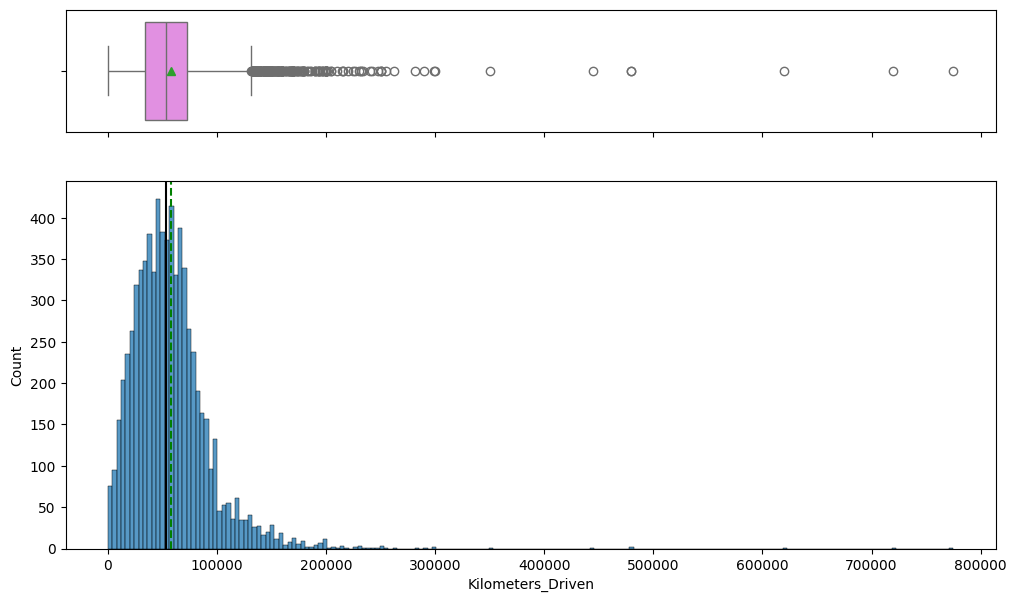

In [22]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data, 'Kilometers_Driven')

* Kilometers_Driven is highly right-skewed. It is very difficult to interpret. Log transformation can be used to reduce/remove the skewness. Log transformed value can be used for analysis

Text(0.5, 0, 'Log(Kilometers_Driven)')

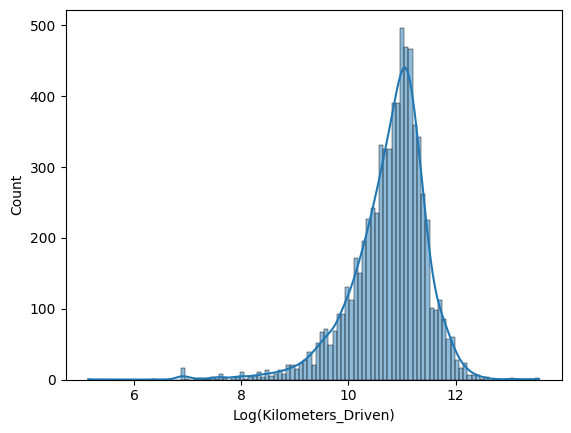

In [23]:
sns.histplot(np.log(data["Kilometers_Driven"]), kde=True)
plt.xlabel('Log(Kilometers_Driven)')


**Observations**
* Log transformation of data has reduced the extreme skewness
* From box-plot we can see the outliers, as we discussed in summary statistics

In [24]:
# Adding a transformed kilometers_driven feature to the data.
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

### **Box plot and Histogram for Mileage**

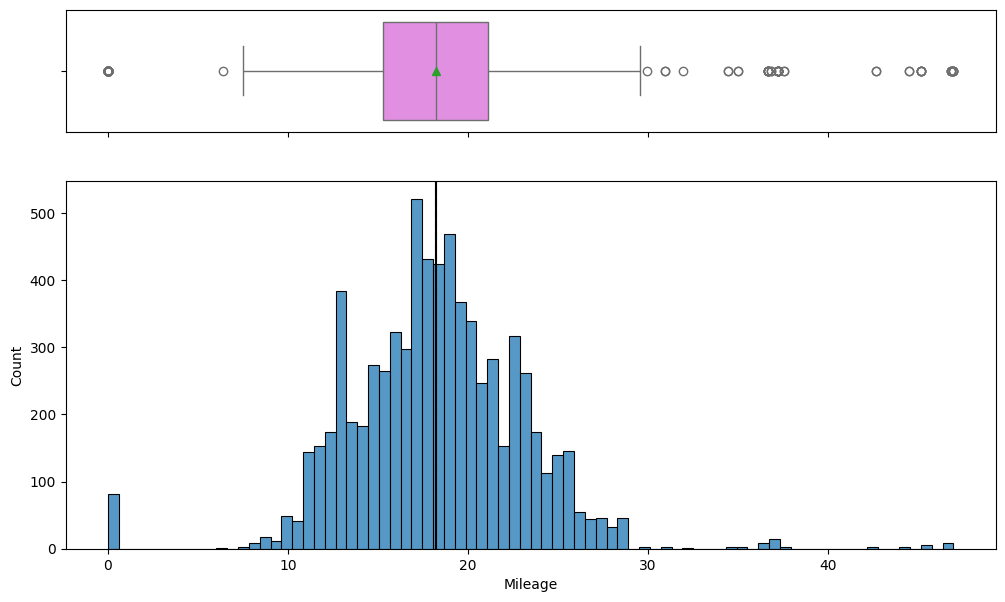

In [25]:
histogram_boxplot(data, 'Mileage')

**Observations**
* The distribution of mileage looks fairly normally distributed if we ignore the cars with 0 mileage.
* From box plot also it is visible that the extreme values can be seen as outliers

### **Box plot and Histogram for Power**

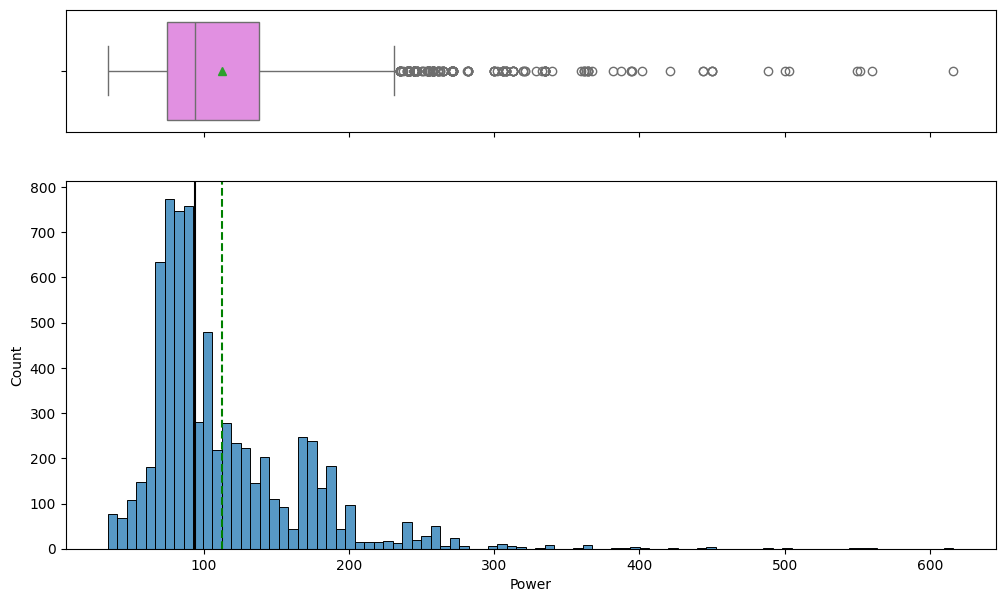

In [26]:
histogram_boxplot(data, 'Power')

**Observations**
* Most cars have Power of engines between 90-100 bhp
* From the boxplot, we can see that there are many outliers in this variable -  cars with more than 250 bhp are being considered as outliers in data

### **Box plot and Histogram for Price**

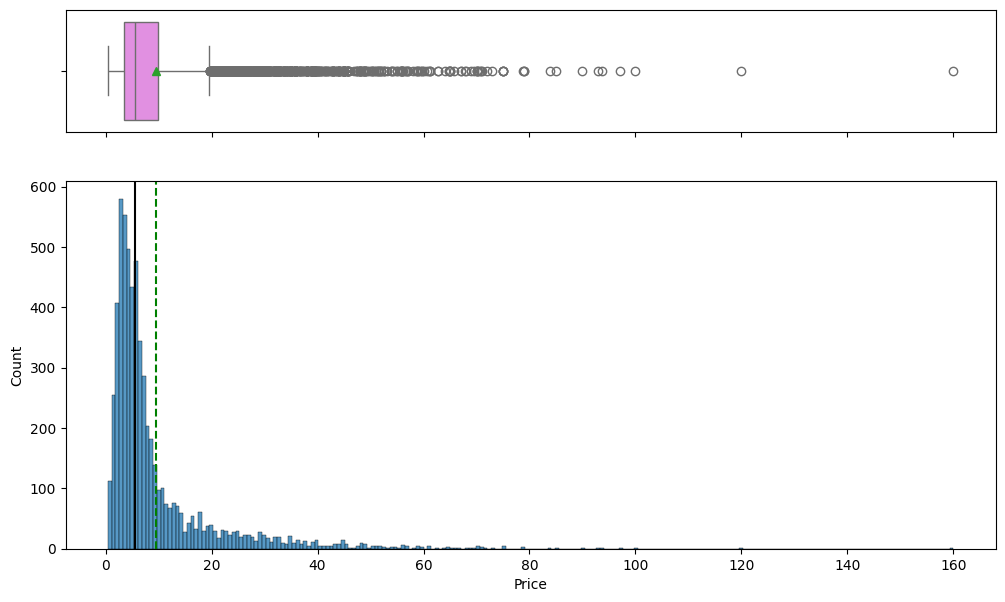

In [27]:
histogram_boxplot(data, 'Price')

* The distribution of Price is highly skewed, we can use log transformation on this column to see if that helps normalize the distribution.

Text(0.5, 0, 'Log(Price)')

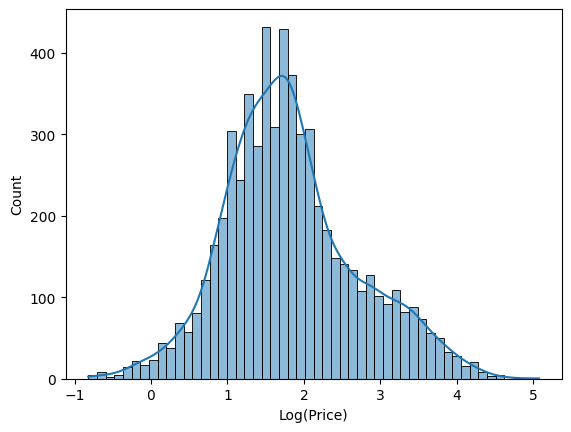

In [28]:
sns.histplot(np.log(data["Price"]), kde=True)
plt.xlabel('Log(Price)')

**Observations**
* Log transformation helps to normalize the distribution
* It is observed that few extreme price values are there, as seen in summary statistics

In [29]:
# Log Transformation has definitely helped in reducing the skew
# Creating a new column with the transformed variable.
data["price_log"] = np.log(data["Price"])

## **2.Univariate analysis - Categorical data**

In [30]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(data, z):
    '''
    plot
    data: DataFrame or Series
    z: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z])  # Length of the column
    plt.figure(figsize=(15, 5))
    ax = sns.countplot(data=data, x=z, palette='Paired', order=data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)  # Percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # Width of the plot
        y = p.get_y() + p.get_height()  # Height of the plot

        ax.annotate(percentage, (x, y), size=12, ha='center')  # Annotate the percentage with center alignment

    plt.show()

### **Barplot for Location**

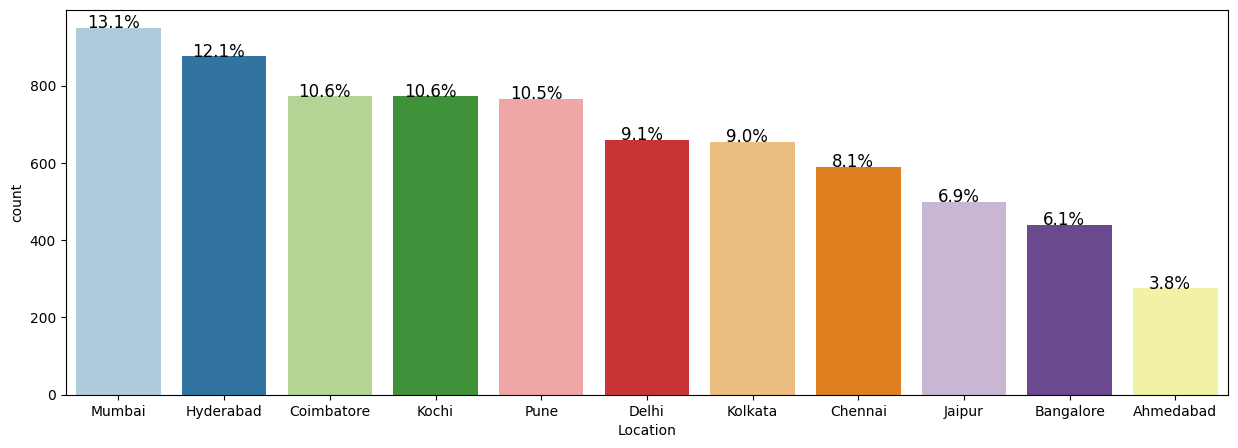

In [31]:
# % values has to have offset

perc_on_bar(data, 'Location')

**Observation**
* 13.1% of the cars are from Mumbai followed by 12.1% of the cars from Hyderabad

### **Barplot for Year**

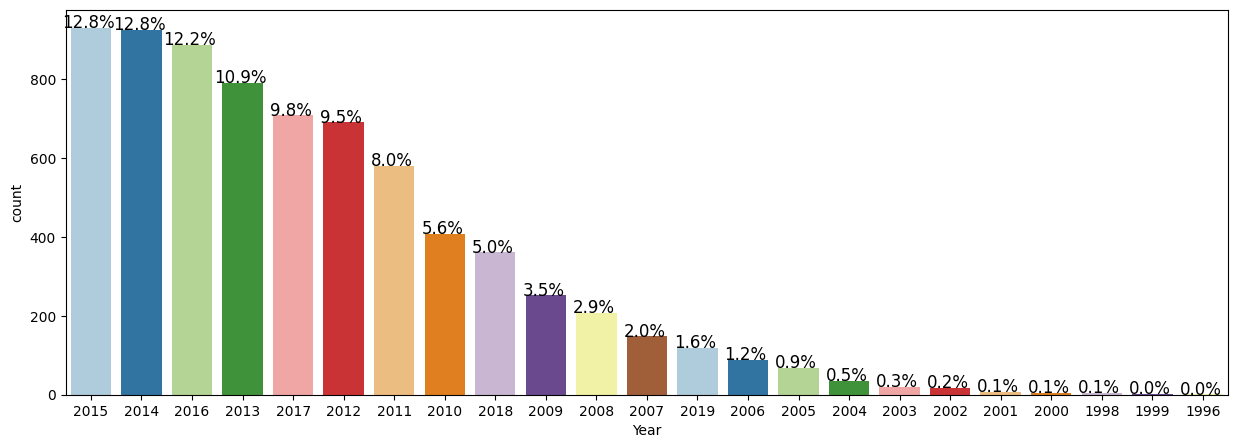

In [32]:
perc_on_bar(data, 'Year')

**Observation**
* About 38% of the cars in the data are from the year 2014 - 2016

### **Barplot for Fuel_Type**

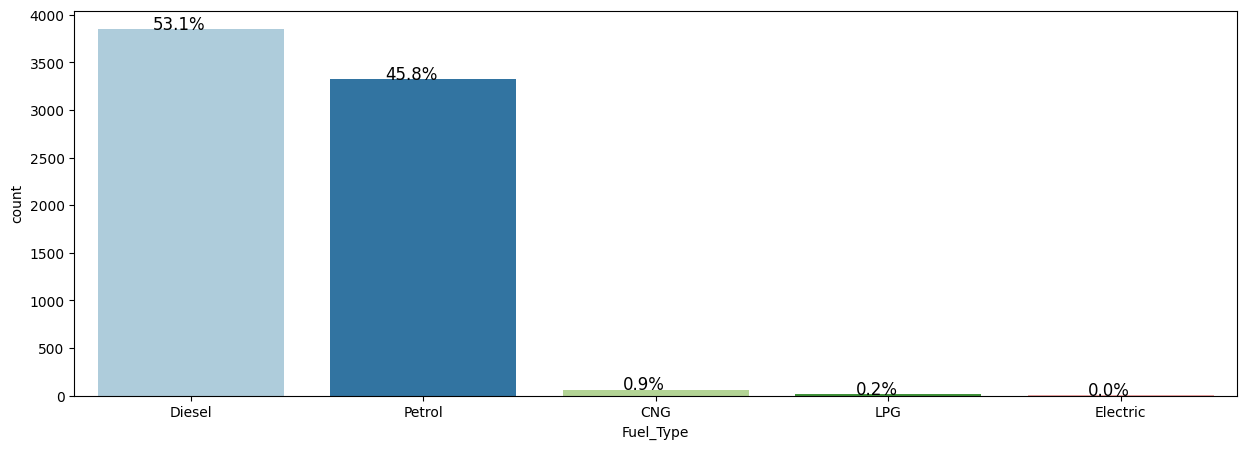

In [33]:
perc_on_bar(data, 'Fuel_Type')

**Observations**
* Approximately 99% of cars are powered by Diesel and Petrol, while the remaining 1% use alternative fuels such as CNG, LPG, and electricity.


### **Barplot for Transmission**

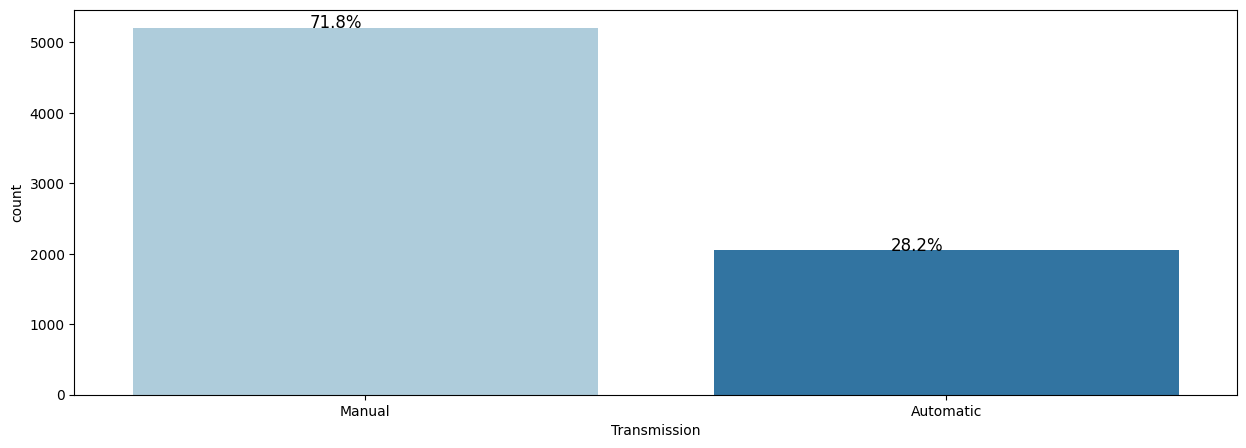

In [34]:
perc_on_bar(data, 'Transmission')

**Observations**
* 71.8% of the cars have a manual transmission

### **Barplot for Owner_Type**

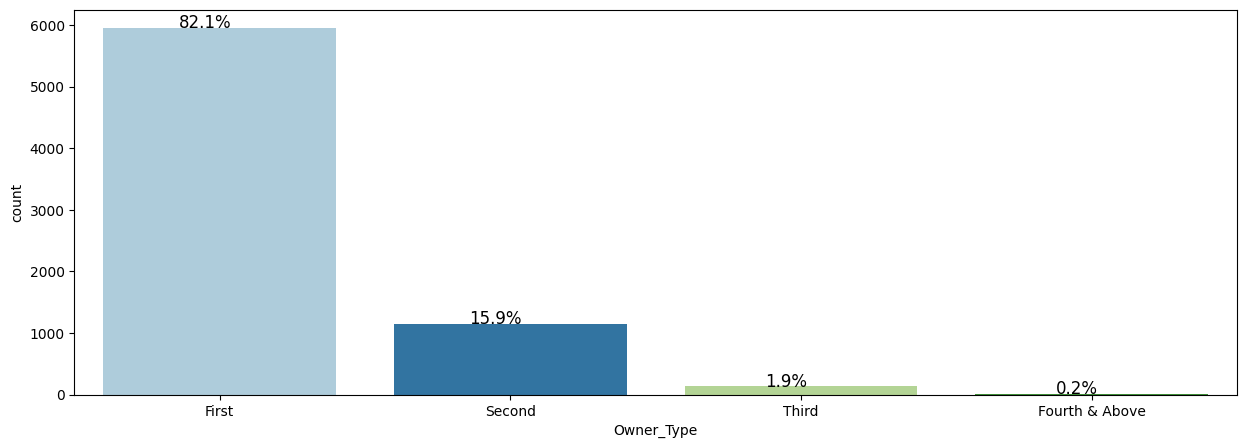

In [35]:
perc_on_bar(data, 'Owner_Type')

**Observations**
* 82.1% of the cars have first owners followed by 15.9% of the cars with second owners

## **Bivariate Analysis**

### **1. Pair plot**
A pair plot allows us to see both distribution of single variables and relationships between two variables

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

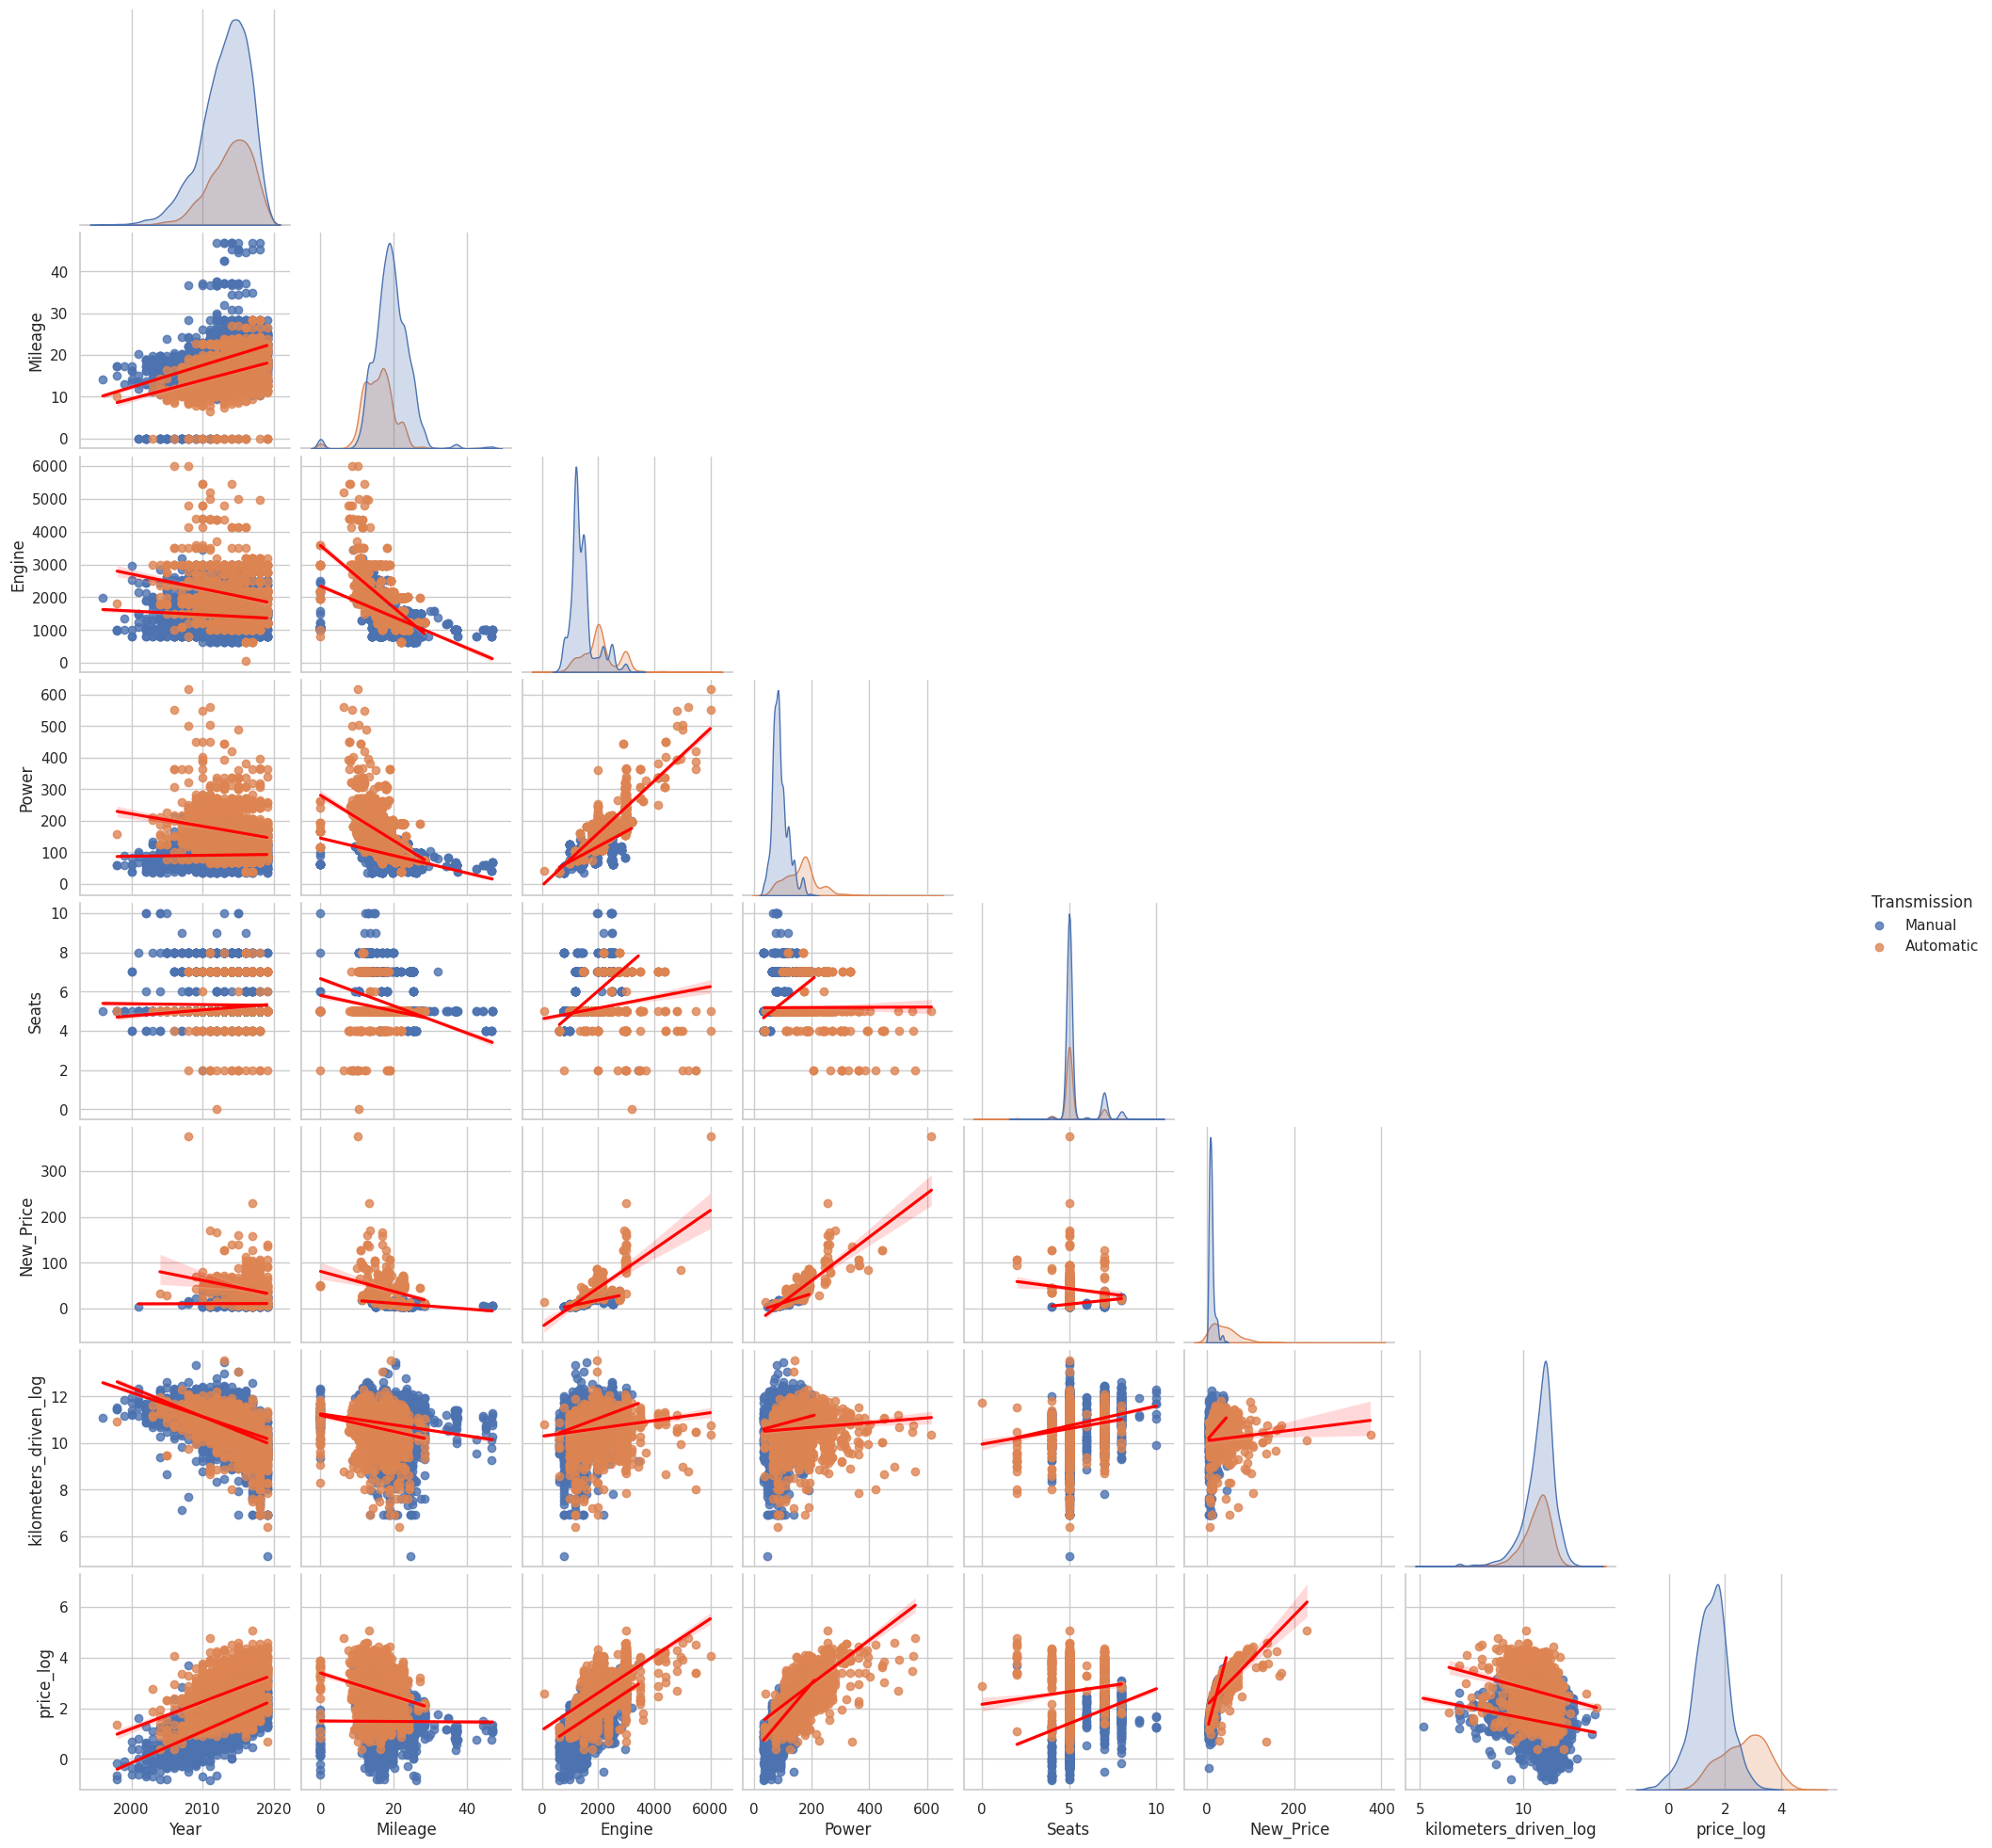

In [36]:
# Let us plot pair plot for the variables. We can include the log transformation values and drop the original skewed data columns

sns.set(style='ticks', color_codes=True)
sns.set(rc={'figure.figsize':(15,15)}) # Designing the size of the pairplot to accomodate the visualization of all the columns properly
sns.set_style("whitegrid")

sns.pairplot(data.drop(['Kilometers_Driven','Price'],axis = 1), kind = 'reg', plot_kws={'line_kws':{'color': 'red'}}, hue="Transmission", corner=True)
plt.show()

**Observations**

Zooming into these plots gives us a lot of information -

* Contrary to intuition, **Kilometers Driven** have **no relationship** with price
* Price has a **positive relationship with Year**. Newer the car, the higher the price
* 2 seater cars are all luxury variants. Cars with 8-10 seats are exclusively mid to high range
* Mileage does not seem to show much relationship with the price of used cars
* **Engine displacement and Power** of the car have a **positive relationship** with the price
* **New Price** and Used Car Price are also **positively correlated**, which is expected
* Kilometers Driven has a peculiar relationship with the Year variable. Generally, the newer the car lesser the distance it has traveled, but this is not always true
* Mileage and power of newer cars is increasing owing to advancement in technology
* **Mileage** has a **negative correlation** with engine displacement and power. More powerful the engine, the more fuel it consumes in general

### **2. Heat map**
Heat map shows a 2D correlation matrix between two discrete features.

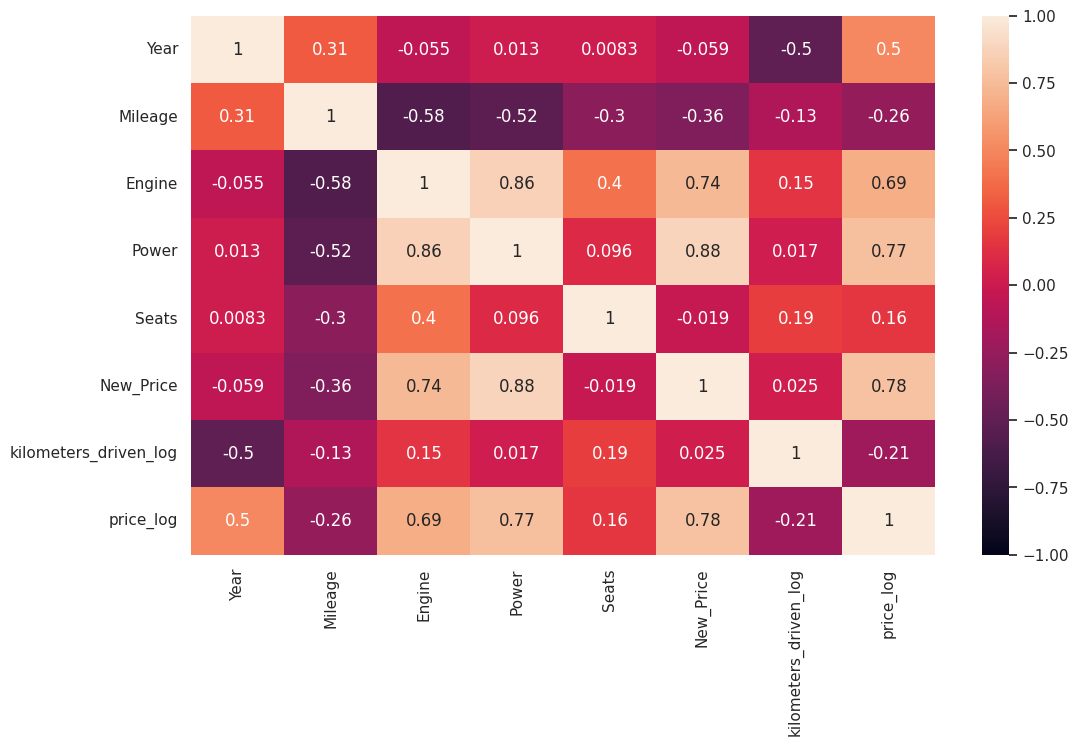

In [37]:
# We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize = (12, 7))
sns.set_style("whitegrid")
# limits the values for 2 decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

sns.heatmap(data.drop(['Kilometers_Driven','Price'],axis = 1).corr(numeric_only = True), annot = True, vmin = -1,vmax = 1)
plt.show()

* Power and engine are important predictors of price
* New_price is also a significant predictor of price

### **3. Box plot**

Performing Bi-variate analysis using Boxplot

In [38]:
# Function to plot boxplot w.r.t Price
def boxplot(z): # Here, z is the name of the column that you want to visualize against the price of the car.

    # Boxplot with outliers
    plt.figure(figsize = (12, 5)) # setting size of boxplot
    # Put color legend on the column z
    plt.title('Boxplot With Outliers')
    sns.boxplot(x = z, y = data['Price'], hue=z) # Defining x and y
    plt.show()

    # Boxplot without outliers
    plt.figure(figsize = (12, 5))
    plt.title('Boxplot Without Outliers')
    sns.boxplot(x = z, y = data['Price'], showfliers = False, hue=z) # Turning off the outliers
    plt.show()

### **Box Plot : Price vs Location**

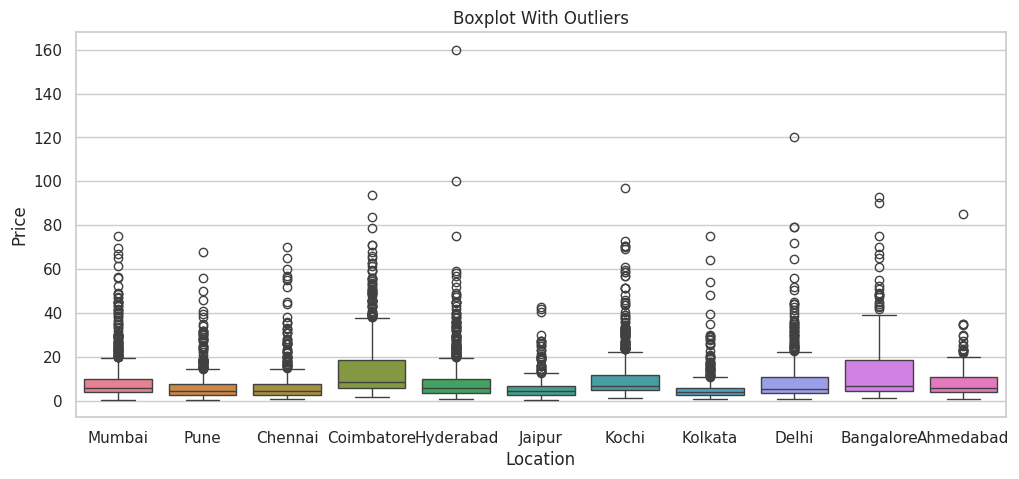

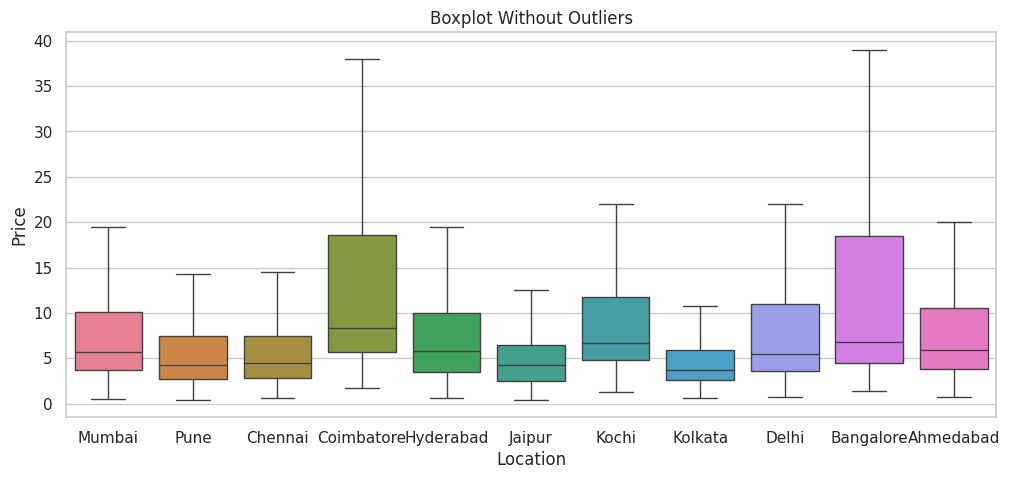

In [39]:
boxplot(data['Location'])

**Observation**
* Price of used cars has a large IQR in Coimbatore and Bangalore

### **Box Plot : Price vs Fuel_Type**

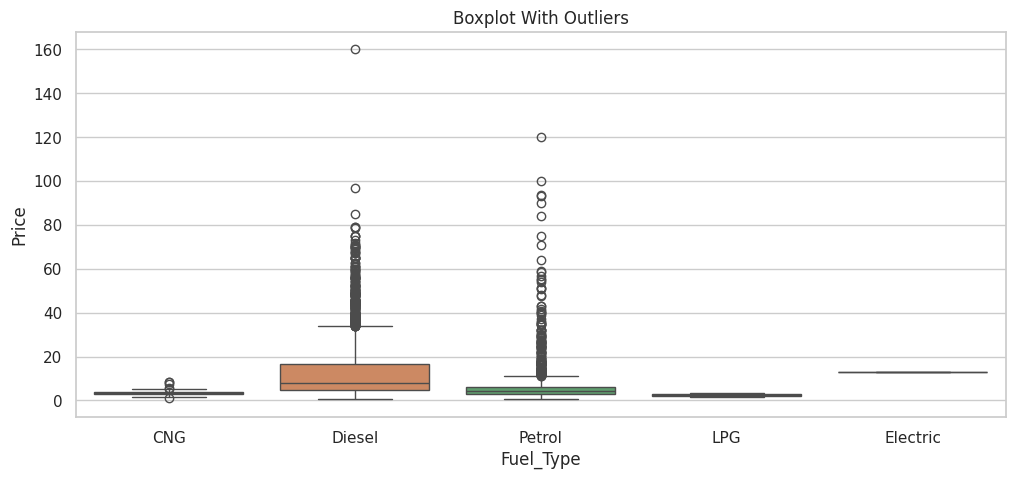

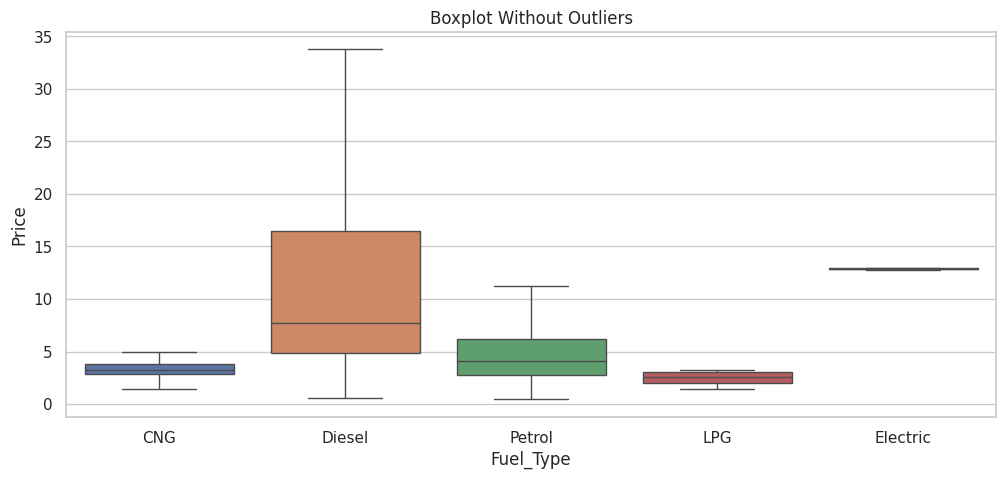

In [40]:
boxplot(data['Fuel_Type'])

**Observations**
* Diesel cars are costlier than Petrol cars
* Electric cars are costlier than CNG and LPG cars

### **Box Plot : Price vs Transmission**

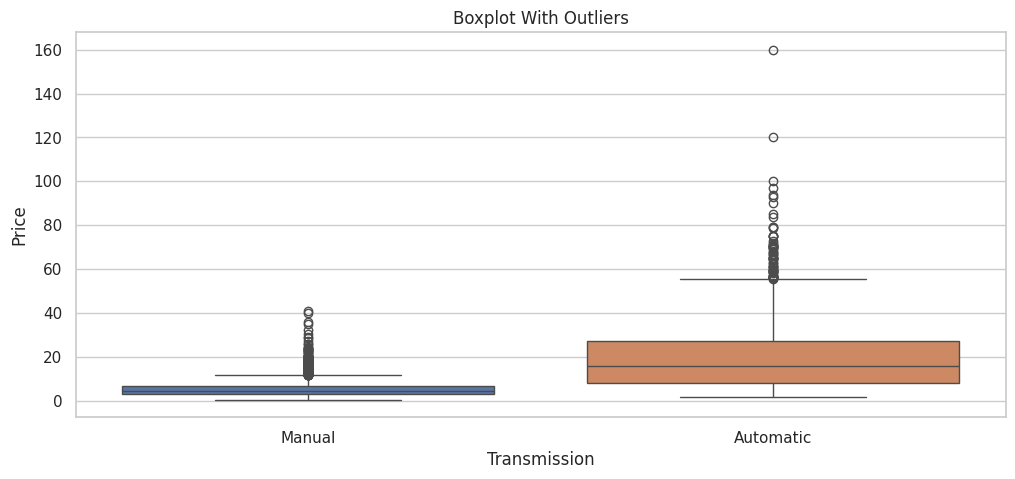

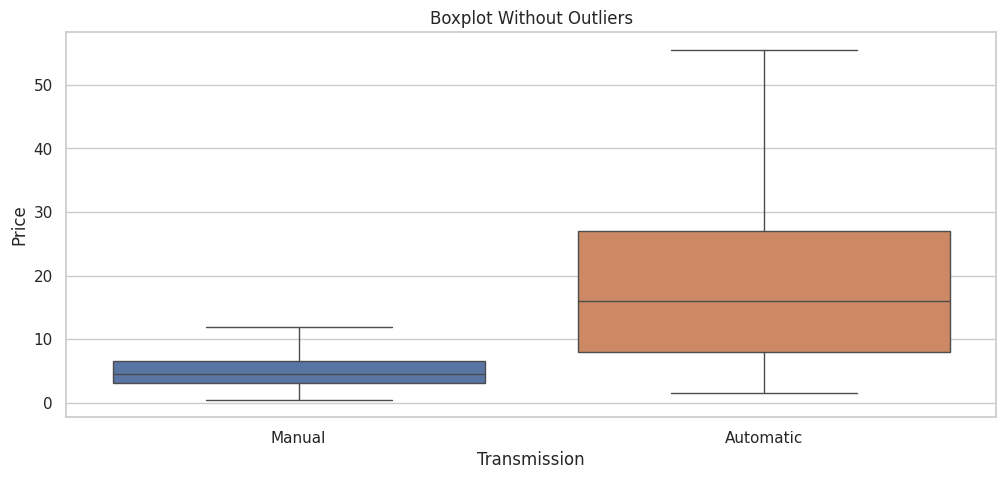

In [41]:
boxplot(data['Transmission'])

**Observation**
* Automatic transmission cars are very costly as compared to cars with manual transmission

### **Box Plot : Price vs Owner_Type**

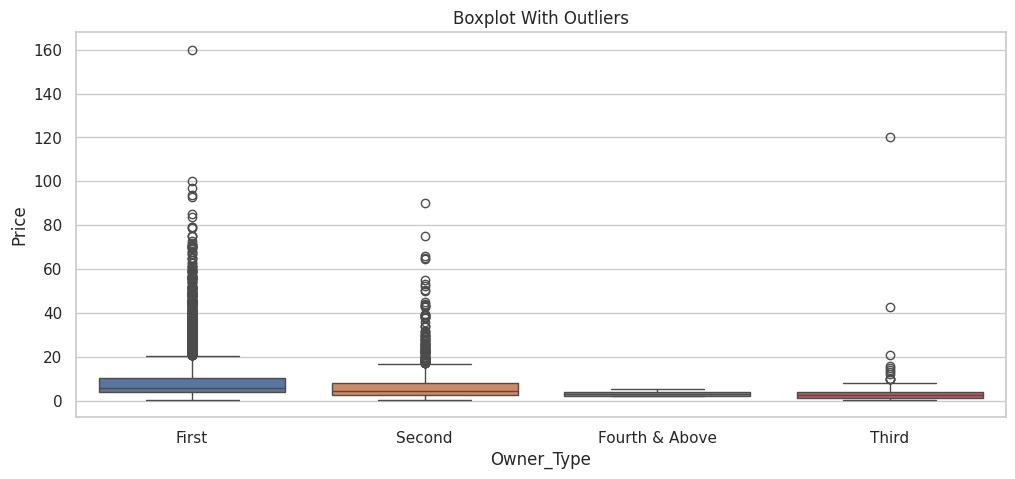

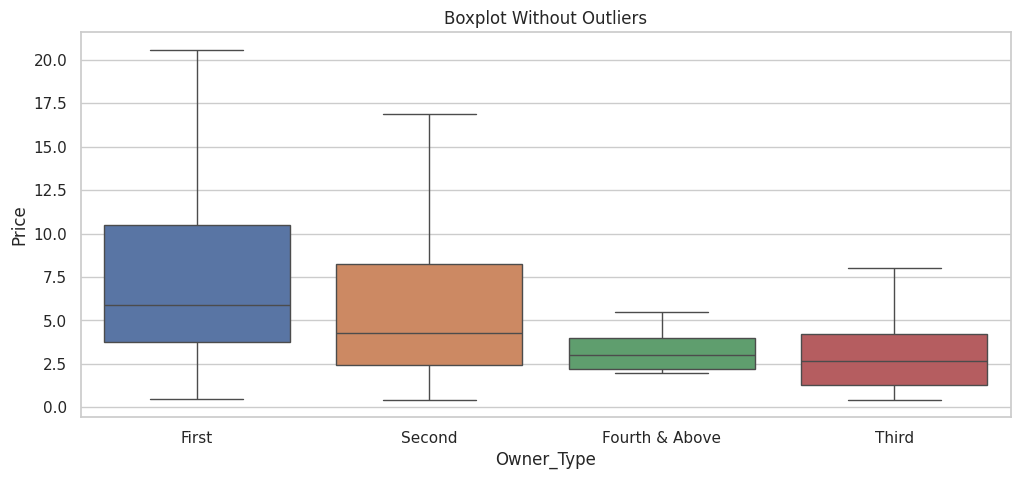

In [42]:
boxplot(data['Owner_Type'])

**Observation**
* Cars with fewer previous owners tend to have higher prices. Notably, third-owner cars might exhibit outliers in price due to the presence of luxury vehicles in this category.


### **Feature engineering**

The `Name` column, which includes both the brand name and model name of each vehicle, contains too many unique values. This high level of uniqueness limits its usefulness for predictive analysis.


In [43]:
data["Name"].nunique()

2041

*
The 'car names' column contains 2041 unique names, making it a poor predictor of price in our current dataset. To improve this, we can process the column to extract meaningful information, which should help reduce the number of unique levels and potentially enhance the predictive power of this feature.


**1. Car Brand Name**

In [44]:
data.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,kilometers_driven_log,price_log
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.00,58.16,5.00,NaN,1.75,11.18,0.56
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.00,126.20,5.00,NaN,12.50,10.62,2.53


In [45]:
# Extract Brand Names
data["Brand"] = data["Name"].apply(lambda x: x.split(" ")[0].lower()) # The brand name is at the very beginning of the vehicle name, and we are making it lowercase.

# Check the data
data["Brand"].value_counts()

,count
Brand,
maruti,1444
hyundai,1340
honda,743
toyota,507
mercedes-benz,380
volkswagen,374
ford,351
mahindra,331
bmw,311


Checking the brand of vehicle that appears most frequently in the dataset

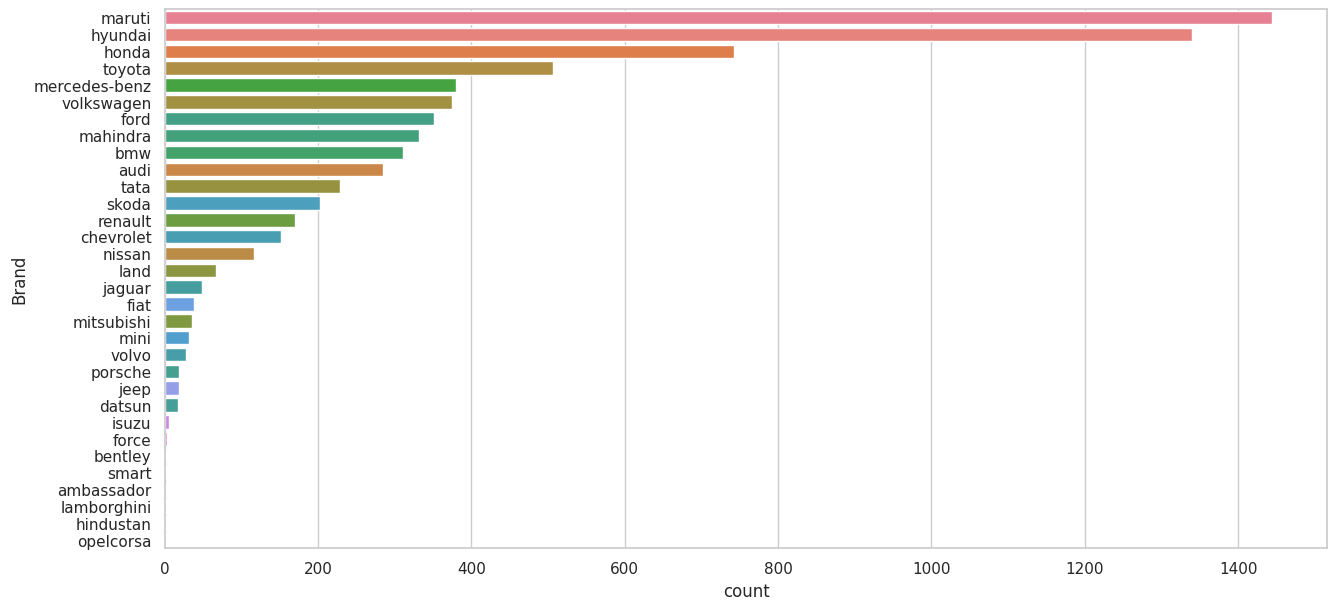

In [46]:
plt.figure(figsize = (15, 7))
sns.countplot(y = "Brand", data = data, order = data["Brand"].value_counts().index, hue='Brand') # Plotting a countplot based on the number of vehicles per brand.
plt.show()

**Observation**
* Most frequent brands in our data are Maruti and Hyundai

**2. Car Model Name**

When we look at the name of the vehicle, first word in the sentence is the brand, second word is the model, etc., so we need to capture the second word which is the model of the vehicle. Python index starts at 0, so the split value 1 will be the model of the vehicle

In [47]:
# Extract Model Names
data["Model"] = data["Name"].apply(lambda x: x.split(" ")[1].lower()) # Extracting the model name and converting it to lowercase.

# Check the data
data["Model"].value_counts()

,count
Model,
swift,418
city,318
i20,303
innova,203
verna,200
alto,183
grand,183
i10,181
wagon,178


Creating countplot for a clearer and more understandable view of the information

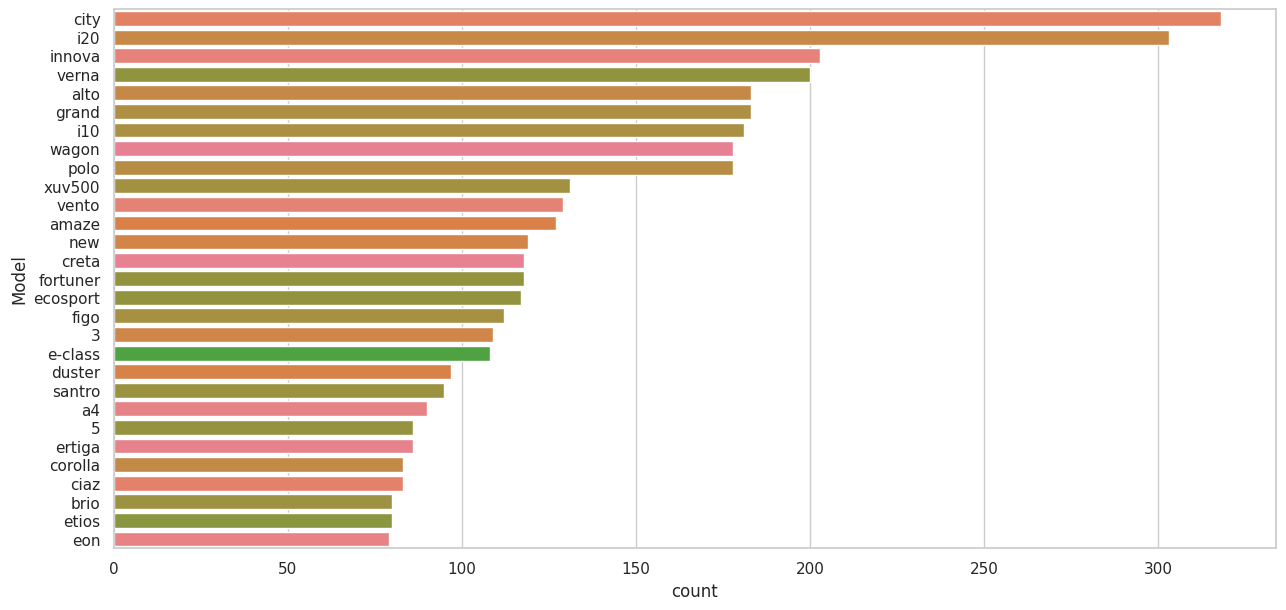

In [48]:
plt.figure(figsize = (15, 7))
sns.countplot(y = "Model", data = data, order = data["Model"].value_counts().index[1:30], hue="Model"); # Plotting a countplot based on the number of vehicles per model for the top 30 models based on count.
plt.show()

**Observations**
* It is clear from the above charts that our dataset contains used cars from luxury as well as budget-friendly brands
* We have extracted brand name and model name, we get a better understanding of the cars we have in our data

We need to also understand, on an average, __what's the price of the vehicle for a specific brand for better understanding of the data__

In [49]:
# Grouping the data based on the brand to find the average price of cars per brand.
data.groupby(["Brand"])["Price"].mean().sort_values(ascending = False)

,Price
Brand,
lamborghini,120.00
bentley,59.00
porsche,48.35
land,39.26
jaguar,37.63
mini,26.90
mercedes-benz,26.81
audi,25.54
bmw,25.09


**Observations**

* The output closely matches our expectations in terms of brand ranking. The average price of a used Lamborghini is 120 Lakhs, with other luxury brands following in descending order.
  
* Towards the lower end, we observe more affordable brands.
  
* We notice some missing data, which we will handle in subsequent steps.

### **Missing value treatment**

In [50]:
# Summing up the number of rows with missing values for each column.
data.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46
Power,175


**Observations**
* Engine displacement information of 46 observations is missing and a maximum power of 175 entries is missing
* Information about the number of seats is not available for 53 entries
* New Price as we saw earlier has a huge missing count
* Price is also missing for 1234 entries. Since price is the response variable that we want to predict, we will have to drop these rows while building the model

**Missing values in Seats**

In [51]:
# Checking the actual rows where the Seats column has missing values.
data[data['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,kilometers_driven_log,price_log,Brand,Model
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,2.95,11.00,1.08,honda,city
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,2.11,10.65,0.75,maruti,swift
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498.00,99.00,NaN,NaN,3.60,11.16,1.28,ford,figo
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,NaN,1.75,11.49,0.56,maruti,swift
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,NaN,26.50,10.92,3.28,land,rover
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,NaN,3.20,10.92,1.16,honda,city
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,5.80,10.83,1.76,maruti,swift
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,NaN,1.50,11.65,0.41,honda,city
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,40.88,11.14,3.71,land,rover
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493.00,100.00,NaN,NaN,1.70,11.39,0.53,honda,city


In [52]:
# We will impute these missing values one by one by taking the median number of seats for the particular car,
# using the brand and model name.
data.groupby(["Brand", "Model"], as_index = False)["Seats"].median() # Checking MEDIAN number of seats for each model of the brands so that we can impute the most appropriate values in missing seats

,Brand,Model,Seats
0,ambassador,classic,5.00
1,audi,a3,5.00
2,audi,a4,5.00
3,audi,a6,5.00
4,audi,a7,5.00
5,audi,a8,5.00
6,audi,q3,5.00
7,audi,q5,5.00
8,audi,q7,7.00
9,audi,rs5,4.00


It looks appropriate to fill the missing values in the 'seats' column with the median number of seats for each model

In [53]:
# Impute missing Seats with the median of each model
data["Seats"] = data.groupby(["Brand", "Model"])["Seats"].transform(lambda x: x.fillna(x.median()))

Checking how many missing and  non-missing rows do we have in the seat column by now

In [54]:
print(f"{data['Seats'].isnull().value_counts()[0]} rows have non-missing values in Seats column \n{data['Seats'].isnull().value_counts()[1]} rows have missing values in Seats column")

7249 rows have non-missing values in Seats column 
3 rows have missing values in Seats column



Now it's time to investigate why there are still missing rows in the 'Seats' column

In [55]:
data[data['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,kilometers_driven_log,price_log,Brand,Model
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.50,1061.00,NaN,NaN,NaN,1.50,10.93,0.41,maruti,estilo
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.50,1061.00,NaN,NaN,NaN,2.50,10.60,0.92,maruti,estilo
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.50,1061.00,NaN,NaN,NaN,1.75,10.84,0.56,maruti,estilo


Based on the domain knowledge, we can fill out the most appropriate value for the missing seats for those 3 rows

In [56]:
# Maruti Estilo can accomodate 5
data["Seats"] = data["Seats"].fillna(5.0)

In [57]:
data.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46
Power,175


Above info shows that there is no more missing data in seat column, however, we got some other columns with the missing values

**Missing values for Mileage**

In [58]:
data[data['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,kilometers_driven_log,price_log,Brand,Model
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.00,41.00,5.00,13.58,13.00,10.82,2.56,mahindra,e
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.00,73.00,5.00,NaN,12.75,10.69,2.55,toyota,prius


It is possible that if the Vehicle is ELECTRIC vehicle, then we will not have a Fuel Mileage, so let's check if the missing mileage column is for the electric vehicle

In [59]:
data[data['Fuel_Type']=='Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,kilometers_driven_log,price_log,Brand,Model
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.00,41.00,5.00,13.58,13.00,10.82,2.56,mahindra,e
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.00,73.00,5.00,NaN,12.75,10.69,2.55,toyota,prius


**Observation**
* 2 Electric car variants don't have entries for Mileage

In this case, we can either drop those two rows, or we can adjust the number for now, just for the analysis. Let's proceed with putting median mileage so that we can keep the record in the dataset

In [60]:
# Impute missing Mileage
data["Mileage"].fillna(data['Mileage'].median(), inplace = True)

Let's now, further validate the missing data

In [61]:
data.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,46
Power,175


Looks like __Mileage__ also no longer has missing values. We can continue working on the rest of the columns with missing values

**Missing values for Engine**

In [62]:
# Impute missing Engine values with the median value.
data["Engine"].fillna(data['Engine'].median(), inplace = True)

**Missing values for Power**

In [63]:
# Impute missing Power value with median value as well
data["Power"].fillna(data['Power'].median(), inplace = True)

**Missing values for New_price**

In [64]:
# Impute missing New_price with the Median price as well, as the mean can be impacted by the outlier in the data
data["New_Price"].fillna(data['New_Price'].median(), inplace = True)

In [65]:
data.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,0


We have got the price and price log column still has the missing value, however, we are responsible to predict the price, so it would not be a good idea to fill the missing values with any statistical number, instead for now, we will drop the rows with the missing values

In [66]:
# Drop the rows where 'Price' == NaN
cars_data = data[data["Price"].notna()]

Let's now perform the final validation of the missing rows in all the columns

In [67]:
cars_data.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,0


**Observation**
* All missing values have been treated.

## **Important Insights from EDA and Data Preprocessing**

* Kilometers_Driven and Price is highly right-skewed. **Log transformation** can be used to **reduce/remove the skewness** and helps to **normalize the distribution**
* Kilometers Driven has a peculiar relationship with the Year variable. Generally, the newer the car lesser the distance it has traveled, but this is not always true
* From box-plots we can see the outliers
* The distribution of mileage looks fairly normally distributed if we ignore the cars with 0 mileage
* About **99%** of the cars run on Diesel and Petrol while the rest 1% cars run on CNG, LPG and electric
* About **38%** of the cars are in the data are for the year 2014 - 2016
* **71.7%** of the cars have a **manual transmission**
* **Automatic transmission** cars are very costly as compared to cars with manual transmission
* Price of used cars has a large IQR in Coimbatore and Bangalore
* Price has a **positive relationship with Year**. Newer the car, the higher the price
* Power and engine are important predictors of price
* New_price is also a significant predictor of price
* **New Price** and Used Car Price are also **positively correlated**, which is expected
* 2 seater cars are all luxury variants. Cars with 8-10 seats are exclusively mid to high range
* Mileage does not seem to show much relationship with the price of used cars
* Mileage and power of newer cars is increasing owing to advancement in technology
* **Mileage** has a **negative correlation** with engine displacement and power. More powerful the engine, the more fuel it consumes in general
* Most cars have Power of engines between 90-100 bhp
* **Engine displacement and Power** of the car have a **positive relationship** with the price
* **82%** of the cars have first owners followed by **15.9%** of the cars with second owners
* Cars with fewer owners have higher prices, outliers in third owner cars these might be the luxury cars

## **Building Various Models**

1. What we want to predict is "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to __encode categorical features__. We will drop categorical features like Name.
3. We'll __split the data into train and test__, to be able to evaluate the model that we build on the train data.
4. Build __Regression__ models using train data.
5. __Evaluate__ the model performance.

### **Split the Data**

<li>Step1: Separating the independent variables (X) and the dependent variable (y)
<li>Step2: Encode the categorical variables in X using pd.dummies
<li>Step3: Split the data into train and test using train_test_split

For the final validation and understanding of the data types, to ensure that the correct columns are used for encoding, let's check the information about the data using `.info`.

In [68]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6018 entries, 0 to 6018
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   6018 non-null   object 
 1   Location               6018 non-null   object 
 2   Year                   6018 non-null   int64  
 3   Kilometers_Driven      6018 non-null   int64  
 4   Fuel_Type              6018 non-null   object 
 5   Transmission           6018 non-null   object 
 6   Owner_Type             6018 non-null   object 
 7   Mileage                6018 non-null   float64
 8   Engine                 6018 non-null   float64
 9   Power                  6018 non-null   float64
 10  Seats                  6018 non-null   float64
 11  New_Price              6018 non-null   float64
 12  Price                  6018 non-null   float64
 13  kilometers_driven_log  6018 non-null   float64
 14  price_log              6018 non-null   float64
 15  Brand    

<h4><b>Time to split the training variables (X), and target feature (y)

In [69]:
X = cars_data.drop(['Name','Price','price_log','Kilometers_Driven'],axis = 1)
"""
- Dropping the name (not necessary for the ML model as it is an identity feature).
- Dropping the Price and Price Log columns. Price Log is the target variable, and we have created the Price Log column from the Price column, so the Price column is no longer needed.
- We have also created the "kilometers_driven_log" column from the "Kilometers_Driven" column, so the "Kilometers_Driven" column is no longer needed.
"""
X = pd.get_dummies(X, columns = X.select_dtypes(include = ["object", "category"]).columns.tolist(), dtype=int, drop_first = True)
"""
Further, we are creating dummy variables for the categorical variables in the data as defined in the above line of code for "object" and "category" types.
Additionally, we will remove the first column of dummies for each categorical variable to avoid the dummy variable trap.
"""
y = cars_data[["price_log", "Price"]] # Target variable

We have already performed the X and y (training features and target variable) split above, now it is good time to split the data into training and test set using <b>scikit-learn framework's Train Test Split function</b>

In [70]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
"""
random_state=1 (or any number) is a seed value for the random number generator. This seed ensures that the random shuffling and splitting of the data are reproducible,
producing the same results every time you run the code. This reproducibility is important because machine learning experiments must be comparable and replicable. If you don't
set the random_state, you will get different results each time you run the code, making it difficult to compare the outcomes of different experiments.
"""

print(X_train.shape, X_test.shape)

(4212, 264) (1806, 264)


Just to validate:

In [71]:
print(f"{round(X_train.shape[0] / X.shape[0] * 100, 0)}% of the data is in training set, and {round(X_test.shape[0] / X.shape[0] * 100, 0)}% of the data is in test set")

70.0% of the data is in training set, and 30.0% of the data is in test set


In [72]:
# Let us write a function for calculating r2_score and RMSE on train and test data.
# This function takes model as an input on which we have trained particular algorithm.

def get_model_score(model, flag = True):

    '''
    model : regressor to predict values of X
    '''
    # Defining an empty list to store train and test results
    score_list = []
    pred_train = model.predict(X_train) # Predict the y values of the training set
    pred_train_ = np.exp(pred_train) # Predict exponentiated value of price as we have log transformed the values earlier due to high difference in price of the vehicles (e.g. Lamborghini)
    pred_test = model.predict(X_test) # Predict price for the unseen data
    pred_test_ = np.exp(pred_test) # Predict exponentiated value of price for unseen data as we have log transformed the values earlier due to high difference in price of the vehicles (e.g. Lamborghini)
    train_r2 = metrics.r2_score(y_train['Price'], pred_train_) # Getting training R^2 values, while comparing Actual price and predicted price (training set)
    test_r2 = metrics.r2_score(y_test['Price'], pred_test_) # Getting test R^2 values, while comparing Actual price and predicted price (test set)
    """
    What is R^2 (R-squared)?
    R-squared is a statistical measure (Goodness of the fit of the Model) that represents the proportion of the variance for a dependent variable
    that's explained by an independent variable or variables in a regression model. It is also known as the coefficient of determination.
    It is calculated as the ratio of the explained variance to the total variance, as the formula is:

                                    R^2 = Explained Variance / Total Variance

    - Explained variance is the variance of the dependent variable that is predictable from the independent variable(s). Explained variance is calculated as the
    sum of squared differences between the actual values and the predicted values divided by the total sum of squared differences.
    - Total Variance is the variance of the dependent variable due to its mean. It is calculated as the sum of squared differences between the actual values and the mean.
    - Value of R^2 ranges from 0 to 1, where 0 represents that the model explains none of the variability of the response data (or dependent variable) around its mean, and 1
    represents that the model explains all the variability of the response data around its mean.
    """
    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_) # Training RMSE tells us what is the average squared error on prediction on training data, it can range from 0 to positive infinity.
    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_) # Test RMSE tells us what is the average squared error on prediction on test data, it can range from 0 to positive infinity.

    #Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))

    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True:
        print("R-square on training set : ", metrics.r2_score(y_train['Price'], pred_train_))
        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))
        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))
        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))

    # Returning the list with train and test scores
    return score_list

### **Fitting a linear model**

Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

In [73]:
# Initiating th linear regression model
lr = LinearRegression()

Fitting the data to train on the Linear Regression Model

In [74]:
lr.fit(X_train,y_train['price_log'])

LinearRegression()

Getting the training and test scores that we defined above for the Linear Regression Model

In [75]:
LR_score = get_model_score(lr)

R-square on training set :  0.9400073865055047
R-square on test set :  0.8691021319140333
RMSE on training set :  2.736529656644789
RMSE on test set :  4.032233968834935


**Observation**
* Linear regression has performed well on training and test set with no overfitting

**Important variables of Linear Regression**

In [76]:
X_train1 = X_train.astype(float) # Converting all the training features into float (decimal) type
y_train1 = y_train.astype(float) # Converting target variable as float type as well

<b>Quick Notes:</b><br>
The constant (also known as the intercept or bias term) is the value at which the regression line crosses the y-axis.
It represents the predicted value of the dependent variable (y) when all the independent variables (x) are equal to zero.

Mathematically, in a simple linear regression model, the equation is:<br>
<center>y = b0 + b1x, where<br></center> - y is the dependent (target that we want to predict) variable,<br> - x is the independent variable, <br>- b0 is the intercept (constant), and, <br>- b1 is the slope.<br><br>
For example, if you are modeling the relationship between temperature (x) and energy consumption (y), the constant might represent the base level of energy consumption when the temperature is zero.

<b>Ordinary Least Squares (OLS)</b> model is a method used to estimate the unknown parameters (coefficients) in a linear regression model.
Its goal is to find the best-fitting line (or hyperplane in multiple dimensions) that minimizes the sum of the squared differences between the observed values (actual data points)
and the predicted values (values on the regression line).

In [77]:
# Import Statsmodels
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly
x_train = sm.add_constant(X_train1)

# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):

    # Create the model
    olsmodel = sm.OLS(y_train1["price_log"], train)

    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)

print(olsmodel1.summary())



                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     406.8
Date:                Sat, 22 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:44:33   Log-Likelihood:                 1322.8
No. Observations:                4212   AIC:                            -2188.
Df Residuals:                    3983   BIC:                            -734.3
Df Model:                         228                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [78]:
# Calculate Odds Ratio and probability.
# Create a data frame to collate Odds ratio, probability, and p-value of the coefficients.
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])
olsmod['pval'] = olsmodel1.pvalues

In [79]:
# Filter by significant p-value (pval <0.05) and sort descending by Odds ratio
olsmod = olsmod.sort_values(by = "pval", ascending = False)
pval_filter = olsmod['pval']<= 0.05
olsmod[pval_filter]

,coef,pval
Model_s-class,-0.22,0.05
Model_verna,0.25,0.05
Model_getz,-0.29,0.04
Model_accent,-0.29,0.03
New_Price,-0.00,0.03
Model_s-cross,-0.46,0.02
Model_freestyle,-0.41,0.01
Model_platinum,0.00,0.01
Model_nexon,-0.52,0.01
Model_versa,-0.50,0.01


In [80]:
# We are looking for overall significant variables.

pval_filter = olsmod['pval']<= 0.05
imp_vars = olsmod[pval_filter].index.tolist()

# We are going to retrieve the original variables (non-one-hot encoded variables) from categorical variables.

sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)


start = '\033[1m'
end = '\033[95m'
print(start+'Most overall significant categorical varaibles of LINEAR REGRESSION  are '+end,':\n',sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Model', 'New_Price', 'Location', 'Fuel_Type', 'Engine', 'Owner_Type', 'Power', 'Transmission', 'kilometers_driven_log', 'Brand', 'Year']


### **Ridge Regression**

Also Known as __L2 Regularization__, shrinks the coefficients evenly but does not necessarily bring them to zero. This means that less significant features will still have some influence on the final prediction. L2 regularization can help reduce model complexity but may be less robust to outliers.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

Initializing the Ridge Regression Model

In [81]:
rdg = Ridge()

Fitting the training data into Ridge Regression Model

In [82]:
rdg.fit(X_train,y_train['price_log'])

Ridge()

Looking at the performance scores from Ridge Regression

In [83]:
Ridge_score = get_model_score(rdg)

R-square on training set :  0.930779949829479
R-square on test set :  0.8945228764084663
RMSE on training set :  2.9394577553162953
RMSE on test set :  3.6195833034782705


**Observation**
* Ridge regression is able to generalize well compared to Linear Regression

### **Decision Tree**

Initializing the Decision Tree Regressor Machine Learning model

In [84]:
dtree = DecisionTreeRegressor(random_state = 1)

Fitting the data into a DecisionTree regressor model

In [85]:
dtree.fit(X_train,y_train['price_log'])

DecisionTreeRegressor(random_state=1)

Getting the Performance Score for Decision Tree Model

In [86]:
Dtree_model = get_model_score(dtree)

R-square on training set :  0.9999965696959587
R-square on test set :  0.8169104136392586
RMSE on training set :  0.020692719736775493
RMSE on test set :  4.768823610637629


**Observation**
* Decision Tree is overfitting on the training set and hence not able to generalize well on the test set

In [87]:
# Importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
Power                     0.61
Year                      0.23
Engine                    0.04
Mileage                   0.02
kilometers_driven_log     0.01
New_Price                 0.01
Transmission_Manual       0.00
Brand_tata                0.00
Location_Kolkata          0.00
Brand_honda               0.00
Brand_audi                0.00
Brand_mini                0.00
Brand_skoda               0.00
Location_Hyderabad        0.00
Brand_land                0.00
Fuel_Type_Petrol          0.00
Location_Coimbatore       0.00
Brand_mahindra            0.00
Location_Delhi            0.00
Owner_Type_Second         0.00
Brand_volkswagen          0.00
Model_5                   0.00
Brand_toyota              0.00
Brand_hyundai             0.00
Seats                     0.00
Location_Mumbai           0.00
Model_creta               0.00
Brand_mercedes-benz       0.00
Location_Bangalore        0.00
Owner_Type_Third          0.00
Model_swift               0.00
Location

**Observation**
* Power, Year and Engine are the top 3 important features of decision tree model

Linear Regression (Ordinary Least Squares, OLS):

Objective:
Minimizes the sum of squared errors between the predicted and actual values.
Formula:
Minimize
∑
𝑖
=
1
𝑛
(
𝑦
𝑖
−
𝑥
𝑖
⊤
𝛽
)
2
Minimize
i=1
∑
n
​
 (y
i
​
 −x
i
⊤
​
 β)
2

Characteristics:
No penalty on the size of coefficients.
Can be sensitive to multicollinearity (i.e., when predictors are highly correlated).
Coefficients are interpreted as the change in the target variable for a one-unit change in the predictor.
Ridge Regression:

Objective:
Extends OLS by adding a regularization term that penalizes the sum of squared coefficients. This helps to reduce overfitting and handle multicollinearity.
Formula:
Minimize
∑
𝑖
=
1
𝑛
(
𝑦
𝑖
−
𝑥
𝑖
⊤
𝛽
)
2
+
𝜆
∑
𝑗
=
1
𝑝
𝛽
𝑗
2
Minimize
i=1
∑
n
​
 (y
i
​
 −x
i
⊤
​
 β)
2
 +λ
j=1
∑
p
​
 β
j
2
​

Here,
𝜆
λ is a hyperparameter controlling the strength of the penalty.
Characteristics:
The penalty (or regularization) term shrinks coefficients towards zero, but unlike Lasso, it does not set them exactly to zero.
More robust when predictors are correlated because it reduces the variance of the coefficient estimates.
Introduces a bias in the estimates (bias-variance trade-off) that can lead to better predictive performance on unseen data.
Why the Difference Matters:

Overfitting & Stability:

Linear Regression can overfit the training data, especially when there are many predictors or when predictors are correlated, resulting in unstable coefficient estimates.
Ridge Regression reduces overfitting by penalizing large coefficients, leading to more stable and reliable predictions.
Model Complexity:

Linear Regression relies solely on the data to determine the coefficient sizes.
Ridge Regression introduces an extra parameter (
𝜆
λ) that needs tuning, but in return, it can improve generalization by controlling model complexity.
Interpretability:

While Linear Regression provides coefficients that are easy to interpret directly, the shrinkage in Ridge Regression can make interpretation less straightforward because the coefficients are biased. However, the trade-off is often worthwhile for improved predictive performance.
In summary, Ridge Regression modifies linear regression by adding a regularization term, helping to address issues like overfitting and multicollinearity, especially when dealing with high-dimensional data or correlated predictors.

### **Random Forest**

RandomForest Regressor is a powerful ensemble learning method used for regression tasks in machine learning. It combines the predictions of multiple decision trees into a single, more accurate and robust prediction.<br>
<b><u>How it Works:</u></b>
<li><b>Bootstrap Sampling</b>: RandomForest creates multiple subsets of the training data through bootstrapping, which means sampling with replacement. Each subset is used to train a decision tree.
<li><b>Random Feature Selection</b>: At each node of each decision tree, a random subset of features is considered for splitting. This adds randomness and diversity to the model, helping to reduce overfitting.
<li><b>Aggregation</b>: The predictions from all the individual decision trees are aggregated to make the final prediction. This is typically done by averaging the predictions for regression tasks.

Initializing the RandomForest Regressor Model

In [88]:
rf = RandomForestRegressor(random_state = 1,oob_score = True)
"""
oob_score (Out-of-Bag score) is a way to estimate the model's performance without the need for cross-validation.
It leverages the way Random Forests are constructed to provide a built-in evaluation mechanism.
"""

"\noob_score (Out-of-Bag score) is a way to estimate the model's performance without the need for cross-validation.\nIt leverages the way Random Forests are constructed to provide a built-in evaluation mechanism.\n"

Fitting the data to the model

In [89]:
rf.fit(X_train,y_train['price_log'])

RandomForestRegressor(oob_score=True, random_state=1)

Getting the performance scores with the RandomForest Regressor

In [90]:
RandomForest_model = get_model_score(rf)

R-square on training set :  0.9763606681935696
R-square on test set :  0.848507692326137
RMSE on training set :  1.7177852388358554
RMSE on test set :  4.337851973403107


**Observation**
* Random Forest model has performed well on training and test set

**Feature Importance**

In [91]:
# Importance of features in the model ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print(pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
Power                     0.61
Year                      0.23
Engine                    0.04
kilometers_driven_log     0.02
Mileage                   0.01
New_Price                 0.01
Location_Kolkata          0.00
Transmission_Manual       0.00
Brand_tata                0.00
Seats                     0.00
Brand_honda               0.00
Location_Hyderabad        0.00
Model_rover               0.00
Brand_land                0.00
Brand_mahindra            0.00
Brand_mercedes-benz       0.00
Location_Coimbatore       0.00
Brand_mini                0.00
Owner_Type_Second         0.00
Fuel_Type_Diesel          0.00
Brand_skoda               0.00
Location_Bangalore        0.00
Brand_audi                0.00
Model_creta               0.00
Fuel_Type_Petrol          0.00
Brand_bmw                 0.00
Location_Delhi            0.00
Location_Mumbai           0.00
Model_5                   0.00
Model_swift               0.00
Brand_toyota              0.00
Location

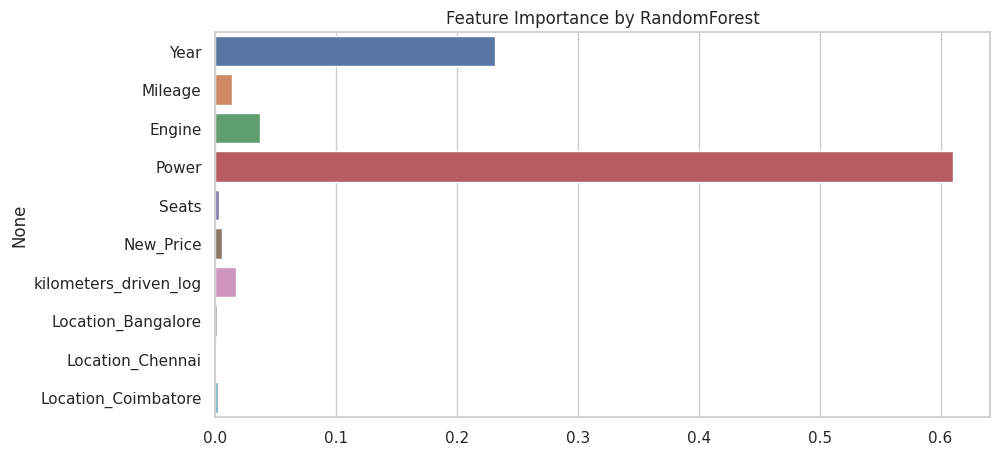

In [92]:
# Plotting the first 10 important features from RandomForest in the descending order
plt.figure(figsize = (10, 5))
sns.barplot(x = rf.feature_importances_[0:10], y = X_train.columns[0:10], hue=X_train.columns[0:10])
plt.title("Feature Importance by RandomForest")
plt.show()


**Observation**
* Power, Year and Engine are the top 3 important features of decision tree model

https://medium.com/@prasannarghattikar/using-random-forest-for-feature-importance-118462c40189





### **Hyperparameter Tuning - Decision Tree**

In [93]:
# Choose the type of regressor.
dtree_tuned = DecisionTreeRegressor(random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': [None],
              'min_samples_leaf': [1, 3, 5, 7],
              'max_leaf_nodes' : [2, 5, 7] + [None],
             }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring = scorer,cv = 5)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_tuned.fit(X_train, y_train['price_log'])

DecisionTreeRegressor(min_samples_leaf=7, random_state=1)

In [94]:
dtree_tuned_score = get_model_score(dtree_tuned)

R-square on training set :  0.9058722277131451
R-square on test set :  0.8051893832488712
RMSE on training set :  3.4277580417926696
RMSE on test set :  4.919101093413935


**Observation**
* Overfitting in decision tree is not there now.

**Feature Importance**

In [95]:
# Importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
Power                     0.64
Year                      0.24
Engine                    0.05
Mileage                   0.02
kilometers_driven_log     0.01
Transmission_Manual       0.01
Brand_honda               0.00
Brand_tata                0.00
Location_Kolkata          0.00
New_Price                 0.00
Fuel_Type_Diesel          0.00
Brand_audi                0.00
Brand_mahindra            0.00
Seats                     0.00
Location_Hyderabad        0.00
Location_Coimbatore       0.00
Model_innova              0.00
Model_swift               0.00
Model_creta               0.00
Location_Jaipur           0.00
Brand_toyota              0.00
Fuel_Type_Petrol          0.00
Brand_ford                0.00
Model_q5                  0.00
Location_Kochi            0.00
Model_amaze               0.00
Model_scorpio             0.00
Location_Pune             0.00
Location_Mumbai           0.00
Brand_jeep                0.00
Location_Delhi            0.00
Model_i2

**Observation**
* Power, Year and Engine are the top 3 important features of decision tree model

### **Hyperparameter Tuning - Random Forest**

In [96]:
# Choose the type of regressor

rf_tuned = RandomForestRegressor(random_state = 1,oob_score = True)

# Grid of parameters to choose from
parameters = {
                'max_depth':[5,7,None],
                'max_features': ['sqrt','log2'],
                'n_estimators': [250,500,800,900]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the model to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train['price_log'])

RandomForestRegressor(max_features='sqrt', n_estimators=500, oob_score=True,
                      random_state=1)

In [97]:
rf_tuned_score = get_model_score(rf_tuned)

R-square on training set :  0.9697949688565876
R-square on test set :  0.8613847228821614
RMSE on training set :  1.941739261922651
RMSE on test set :  4.149396975474581


**Observation**
* The Random Forest model does not perform any better after tuning.

**Feature Importance**

In [98]:
# Importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
Power                     0.17
Engine                    0.14
Year                      0.11
Transmission_Manual       0.10
Mileage                   0.05
kilometers_driven_log     0.05
Fuel_Type_Petrol          0.04
Fuel_Type_Diesel          0.03
New_Price                 0.03
Brand_mercedes-benz       0.02
Seats                     0.02
Brand_bmw                 0.02
Brand_audi                0.02
Brand_maruti              0.01
Location_Coimbatore       0.01
Owner_Type_Second         0.01
Brand_tata                0.01
Location_Kolkata          0.01
Model_creta               0.01
Owner_Type_Third          0.00
Model_santro              0.00
Brand_hyundai             0.00
Model_rover               0.00
Brand_land                0.00
Brand_jaguar              0.00
Brand_toyota              0.00
Model_q7                  0.00
Brand_chevrolet           0.00
Location_Pune             0.00
Brand_honda               0.00
Model_alto                0.00
Location

**Observation**
* Power, Year and Engine are the top 3 important variables in predicting car price according to Random Forest

## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:

**Measures of success** :

R-squared and RMSE can be used as a measure of success.

R-squared: This will tell us how much variation our predictive model can explain in data.

RMSE: This will give us a measure of how far off the model is predicting the original values on average.

In [99]:
# Defining list of models
models = [lr,rdg,dtree, dtree_tuned, rf, rf_tuned]

# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train= []
rmse_test= []

# Looping through all the models to get the rmse and r2 scores
for model in models:

    # Accuracy score
    j = get_model_score(model, False)
    r2_train.append(j[0])
    r2_test.append(j[1])
    rmse_train.append(j[2])
    rmse_test.append(j[3])

In [100]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression', 'Ridge Regression', 'Decision Tree', 'Tuned Decision Tree', 'Random Forest',
                                          'Tuned Random Forest'],
                                          'Train_r2' : r2_train,'Test_r2' : r2_test,
                                          'Train_RMSE' : rmse_train,'Test_RMSE' : rmse_test})
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.94,0.87,7.49,16.26
1,Ridge Regression,0.93,0.89,8.64,13.10
2,Decision Tree,1.00,0.82,0.00,22.74
3,Tuned Decision Tree,0.91,0.81,11.75,24.20
4,Random Forest,0.98,0.85,2.95,18.82
5,Tuned Random Forest,0.97,0.86,3.77,17.22


* Ridge Regression and Linear Regression have performed very well on data. However, Ridge Regression has given a more generalized model on training and test set
* There's still scope for improvement with tuning the hyperparameters of the Random Forest

**2. Refined insights**:
**Name:**

- The `Name` column has 2041 unique values and this column would not be very useful in our analysis.
But the name contains both the brand name and the model name of the vehicle and  we can process this column to extract Brand and Model names to reduce the number of levels

**Extracting the car brands:**

- After extracting the car brands from the name column we find that the most frequent brand in our data is Maruti and Hyundai

**Extracting car model name:**

- After extracting the car name it gets clear that our dataset contains used cars from luxury as well as budget-friendly brands
- The mean price of a used Lamborghini is 120 Lakhs and that of cars from other luxury brands follow in descending order and this output is very close to our expectation (domain knowledge), in terms of brand order.
Towards the bottom end, we have more budget friendly brands

**Important variable with Linear Regression:**
* According to the Linear Regresion model the most significant predictors of the price of used cars are -
    - Year
    - Power
    - New_price
    - Location
    - Kilometers_Driven
    - Fuel_Type
    - Owner_Type
    - Transmission

**Important variable with Random Forest:**
* According to the Random Forest model the most significant predictors of the price of used cars are
 - Power of the engine
 -The year of manufacturing
 -Engine
 -Mileage


**3. Proposal for the final solution design**:

*Overall solution design* :

The potential solution design would look like:
* Checking the data description to get the idea of basic statistics or summary of data
* Univariate analysis to see how data is spread out, getting to know about the outliers
* Bivariate analysis to see how different attributes vary with the dependent variable
* Outlier treatment if needed - In this case, outlier treatment is not necessary as outliers are the luxurious cars and in real world scenarios such cars would appear in data and we would want our predictive model to capture the underlying pattern for them
* Missing value treatment using appropriate techniques
* Feature engineering - transforming features, creating new features if possible
* Choosing the model evaluation technique - 1) R Squared 2) RMSE can be any other metrics related to regression analysis
* Splitting the data and proceeding with modeling
* Model tuning to see if the performance of the model can be improved further
* Since it is a regression problem we will first start with the parametric model - linear regression,Ridge Regression followed by the non-parametric models - Decision Tree and Random Forest

<br>

*Best Model:*

* The best solution can be determined by considering the combination of R-square and RMSE values for each
model on both the training and test datasets. A higher R-square indicates a better fit of the model to the data,
while a lower RMSE indicates a lower error in the model's predictions. The model with the highest R-square and
lowest RMSE on both the training and test sets would be considered the best solution
* Our final Ridge Regression model has an R-squared of ~0.89 on The test data, which means that our model can explain 89% variation in our data also the RMSE on test data is ~3.62 which means we can predict very closely to the original values. This is a very good model and we can use this model in production
* The model we should adopt is the Ridge Regression
model since it had a very good performance with both the train data
and the test data


<br>

* Business can benefit by getting more cars under the hood:
  - From Tier 1 cities
  - First owner cars
  - Automatic transmission cars
  - High engine powered cars
* Some southern markets tend to have higher prices. It might be a good strategy to plan growth in southern cities using this information. Markets like Kolkata are very risky and we need to be careful about investments in these areas
* We will have to analyze the cost side of things before we can talk about profitability in the business. We should gather data regarding that
* The next step post that would be to cluster different sets of data and see if we should make multiple models for different locations/car types

<br>

* Now Car4U can price their cars competitively and maximize profit by predicting the optimal price for each car with the
Ridge Regression model


